In [0]:
import os
import math
import random
import pickle
import itertools
import numpy as np 
import pandas as pd   
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/'

In [0]:

# catenate df1 and df2 together
df1 = pd.read_csv("gdrive/My Drive/tseries/ecg/mitbih_train.csv", header=None)
df2 = pd.read_csv("gdrive/My Drive/tseries/ecg/mitbih_test.csv", header=None)
df = pd.concat([df1, df2], axis=0)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


# Fourier on Sine and Cosine Additive

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


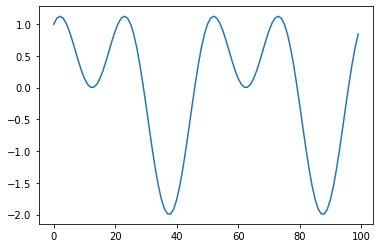

(100,)


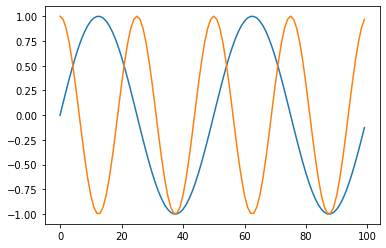

In [0]:
import numpy as np
import matplotlib.pyplot as plt
T = 100
x = np.arange(0,T)
print(x)
y=  np.sin(4*np.pi*x/T)+np.cos(8*np.pi*x/T)
plt.plot(x, y)
plt.show()

print(y.shape)

sp   = np.fft.fft(y)               # the discrete fourier transform
freq = np.fft.fftfreq(y.shape[-1]) # the accompanying frequencies

cos=np.sum([(sp[-i]+sp[i]).real/(2*T)*np.cos(2.*np.pi*freq[i]*x)\
             for i in range(len(freq))],axis=0)
sin=np.sum([(sp[-i]-sp[i]).imag/200.*np.sin(2.*np.pi*freq[i]*x)\
              for i in range(len(freq))],axis=0)

plt.plot(x, sin)
plt.plot(x, cos)
plt.show()

# Iterative Component Split

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


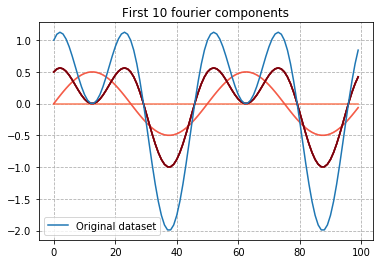

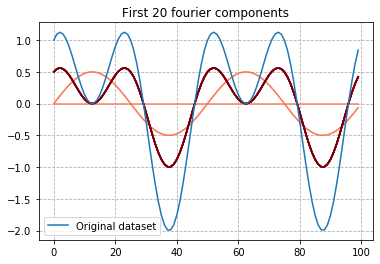

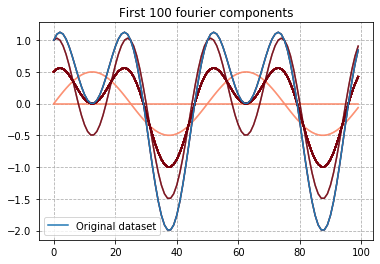

In [0]:
import numpy
from matplotlib import pyplot as plt

n = len(y)
COMPONENTS = [10, 20, n]

for c in COMPONENTS:
    colors = numpy.linspace(start=100, stop=255, num=c)
    for i in range(c):
        Y = numpy.fft.fft(y)
        numpy.put(Y, range(i+1, n), 0.0)
        ifft = numpy.fft.ifft(Y)
        plt.plot(x, ifft, color=plt.cm.Reds(int(colors[i])), alpha=.70)

    plt.title("First {c} fourier components".format(c=c))
    plt.plot(x,y, label="Original dataset")
    plt.grid(linestyle='dashed')
    plt.legend()
    plt.show()

# Fourier Decomposition of Component Waves

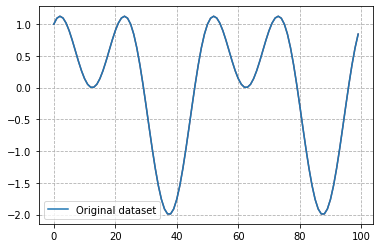

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part


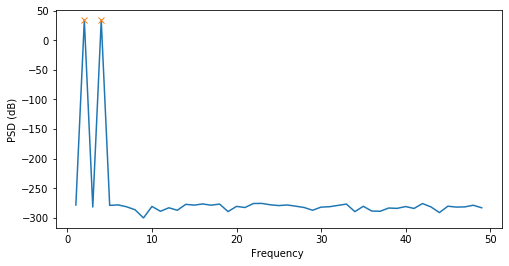

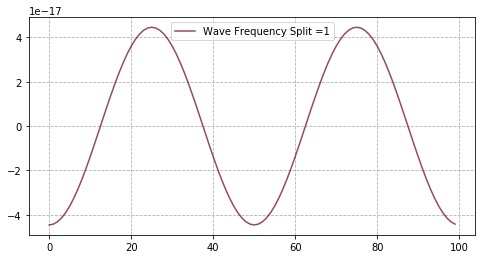

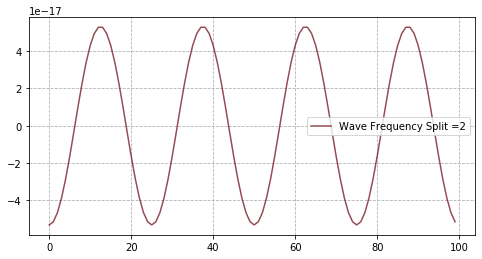

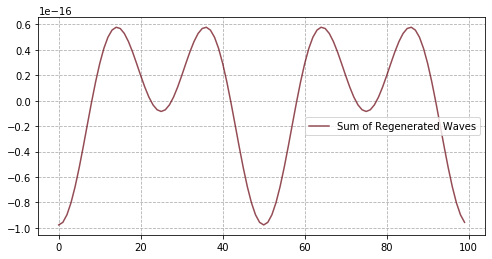

In [0]:

import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


plt.plot(x, y, color=plt.cm.Reds(int(colors[i])), alpha=.70)
plt.plot(x,y, label="Original dataset")
plt.grid(linestyle='dashed')
plt.legend()
plt.show()

n = len(y)
Y = numpy.fft.fft(y)

y_psd = np.abs(Y) ** 2
fftfreq = sp.fftpack.fftfreq(len(y_psd), 1. / 100)
pos = fftfreq > 0
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[pos], 10 * np.log10(y_psd[pos]), label= "Power Spectral Density")
ax.set_xlabel('Frequency ')
ax.set_ylabel('PSD (dB)')

peaks, properties = find_peaks(10 * np.log10(y_psd[pos]))
# Visualize the first 2 peaks
ax.plot(fftfreq[pos][peaks][:2], 10 * np.log10(y_psd[pos])[peaks][:2], "x")

inv_fft_sum = np.zeros(len(Y))

count = 1
for p in peaks:

    if (p <= 3): #Peaks are 1 and 3
      temp_fft = np.zeros(len(Y))
      temp_fft[int(fftfreq[pos][p])] = Y[p]

      inv_fft = np.real(sp.fftpack.ifft(temp_fft))
      inv_fft_sum = inv_fft_sum + inv_fft

      fig, ax = plt.subplots(1, 1, figsize=(8, 4))
      plt.plot(x, inv_fft, color=plt.cm.Reds(int(colors[i])), 
                  alpha=.70, label= "Wave Frequency Split =" + str(count))
      plt.grid(linestyle='dashed')
      plt.legend()
      plt.show()
      count = count + 1

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.plot(x, inv_fft_sum, color=plt.cm.Reds(int(colors[i])), alpha=.70, label="Sum of Regenerated Waves")
plt.grid(linestyle='dashed')
plt.legend()
plt.show()
